In [3]:
# Librerias
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import time

In [12]:
m10=pd.read_csv("matriz_ancha_abejas.M_010.csv")
m3=pd.read_csv("matriz_ancha_abejas.M_003.csv")

print(m10.head())
print(m3.head())


               plantas  Bombus.sp1.M.PL.010
0   Cerastium.arcticum                    0
1  Pedicularis.hirsuta                    0
2   Stellaria.longipes                    0
3   Cassiope.tetragona                    1
4       Silene.acaulis                    1
                  plantas  Anthidium.sp  Bombus.dahlbomii  Megachile.semirufa  \
0          Pozoa.coriacea             0                 0                   0   
1    Cerastium.montioides             0                 0                   0   
2            Draba.tenuis             0                 0                   0   
3  Tropaeolum.polyphyllum             1                 0                   0   
4      Nassauvia.lagascae             0                 0                   0   

   Megachile.sp5  
0              0  
1              0  
2              0  
3              1  
4              0  


In [18]:
for row in m10:
    print(row)

plantas
Bombus.sp1.M.PL.010


In [21]:
print(m10)
print(m3)

                    plantas  Bombus.sp1.M.PL.010
0        Cerastium.arcticum                    0
1       Pedicularis.hirsuta                    0
2        Stellaria.longipes                    0
3        Cassiope.tetragona                    1
4            Silene.acaulis                    1
5   Cochlearia.groenlandica                    0
6             Draba.arctica                    0
7              Draba.lactea                    0
8      Melandrium.triflorum                    0
9            Armeria.scabra                    0
10     Vaccinium.uliginosum                    0
11            Salix.arctica                    1
12  Taraxacum.phymatocarpum                    0
13     Epilobium.latifolium                    0
14      Polygonum.viviparum                    0
15  Rhododendron.lapponicum                    1
16        Saxifraga.nivalis                    0
17    Ranunculus.sulphureus                    0
18    Potentilla.hyparctica                    0
19      Pedicularis.

In [29]:
type(m10)

m102=m10[m10["Bombus.sp1.M.PL.010"]>0]

In [24]:
list_df=m10.to_numpy().tolist()
print(list_df)

[['Cerastium.arcticum', 0], ['Pedicularis.hirsuta', 0], ['Stellaria.longipes', 0], ['Cassiope.tetragona', 1], ['Silene.acaulis', 1], ['Cochlearia.groenlandica', 0], ['Draba.arctica', 0], ['Draba.lactea', 0], ['Melandrium.triflorum', 0], ['Armeria.scabra', 0], ['Vaccinium.uliginosum', 0], ['Salix.arctica', 1], ['Taraxacum.phymatocarpum', 0], ['Epilobium.latifolium', 0], ['Polygonum.viviparum', 0], ['Rhododendron.lapponicum', 1], ['Saxifraga.nivalis', 0], ['Ranunculus.sulphureus', 0], ['Potentilla.hyparctica', 0], ['Pedicularis.flammea', 0], ['Erigeron.compositus', 0], ['Dryas.octopetala', 0], ['Saxifraga.caespitosa', 0], ['Saxifraga.cernua', 0], ['Saxifraga.hirculus', 0], ['Papaver.radicatum', 0], ['Arenaria.pseudofrigida', 0], ['Arnica.angustifolia', 0], ['Saxifraga.oppositifolia', 0], ['Lesquerella.arctica', 0], ['Potentilla.rubricaulis', 0]]


In [25]:
len(list_df)

31

In [44]:
list_df2=m3.to_numpy().tolist()
len(list_df2)

41

In [45]:
print(list_df[2][0])

Stellaria.longipes


In [47]:
label_plant=[]
label_edge=[]
label_spe=[]

for i in range(len(list_df)):
    label_plant.append(list_df[i][0])
    label_edge.append(list_df[i][1])
    label_spe.append(i)
print(label_plant)
print(label_edge)
print(label_spe)

['Cerastium.arcticum', 'Pedicularis.hirsuta', 'Stellaria.longipes', 'Cassiope.tetragona', 'Silene.acaulis', 'Cochlearia.groenlandica', 'Draba.arctica', 'Draba.lactea', 'Melandrium.triflorum', 'Armeria.scabra', 'Vaccinium.uliginosum', 'Salix.arctica', 'Taraxacum.phymatocarpum', 'Epilobium.latifolium', 'Polygonum.viviparum', 'Rhododendron.lapponicum', 'Saxifraga.nivalis', 'Ranunculus.sulphureus', 'Potentilla.hyparctica', 'Pedicularis.flammea', 'Erigeron.compositus', 'Dryas.octopetala', 'Saxifraga.caespitosa', 'Saxifraga.cernua', 'Saxifraga.hirculus', 'Papaver.radicatum', 'Arenaria.pseudofrigida', 'Arnica.angustifolia', 'Saxifraga.oppositifolia', 'Lesquerella.arctica', 'Potentilla.rubricaulis']
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [51]:
BD=nx.Graph()
nodos_A=label_plant
BD.add_nodes_from(nodos_A,bipartite=0)
nodos_B=label_spe
BD.add_nodes_from(nodos_B,bipartite=1)

for i in range(len(list_df)):
    if label_edge[i] == 1: 
        BD.add_edge(label_plant[i],label_spe[i])


Graph with 62 nodes and 4 edges


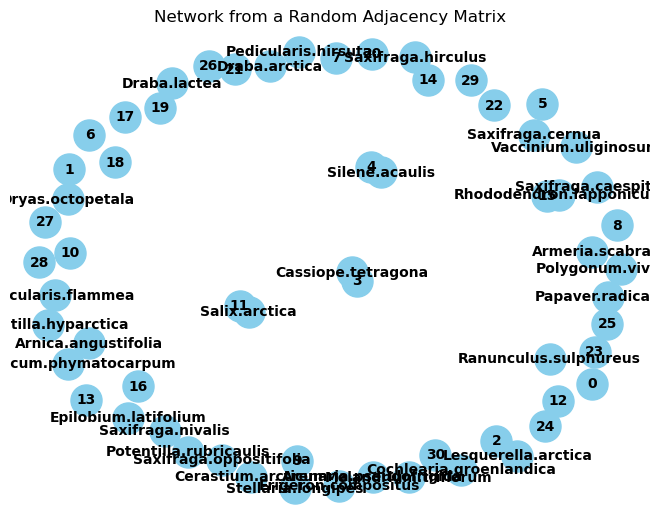

In [52]:
print(BD)
nx.draw(BD, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Network from a Random Adjacency Matrix")
plt.show()


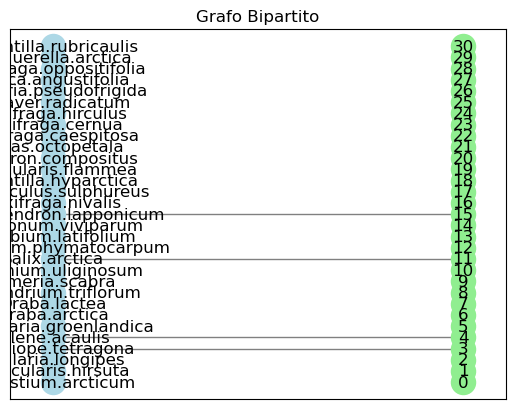

In [53]:

pos = {}
pos.update((node, (1, i)) for i, node in enumerate(nodos_A))
pos.update((node, (2, i)) for i, node in enumerate(nodos_B))


nx.draw_networkx_nodes(BD, pos, nodelist=nodos_A, node_color='lightblue', label='Conjunto A')
nx.draw_networkx_nodes(BD, pos, nodelist=nodos_B, node_color='lightgreen', label='Conjunto B')
nx.draw_networkx_edges(BD, pos, edge_color='gray')
nx.draw_networkx_labels(BD, pos)

plt.title("Grafo Bipartito")
plt.show()

In [65]:
label_plant3=[]
label_edge3=[]
label_spe3=[]

for i in range(len(list_df2)):
    #print(i)
    label_plant3.append(list_df2[i][0])
    for j in range(len(m3.shape[1])):
        print(j)
    #label_edge.append(list_)df[i][1])
    #label_spe.append(i)

print(label_plant3)
#print(label_edge3)
#print(label_spe3)


TypeError: object of type 'int' has no len()

In [32]:
bottom_nodes, top_nodes =bipartite.sets(B)

In [36]:
densidad_bottom=bipartite.density(B,bottom_nodes)
print(round(densidad_bottom,4))
densidad_top=bipartite.density(B,top_nodes)
print(round(densidad_top,4))


0.5556
0.5556
